# 1. Perceptron Algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale range', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

Let's define the step function we will use to classify the point

In [2]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

## Linearly Separable Dataset
Let's define a toy problem:

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

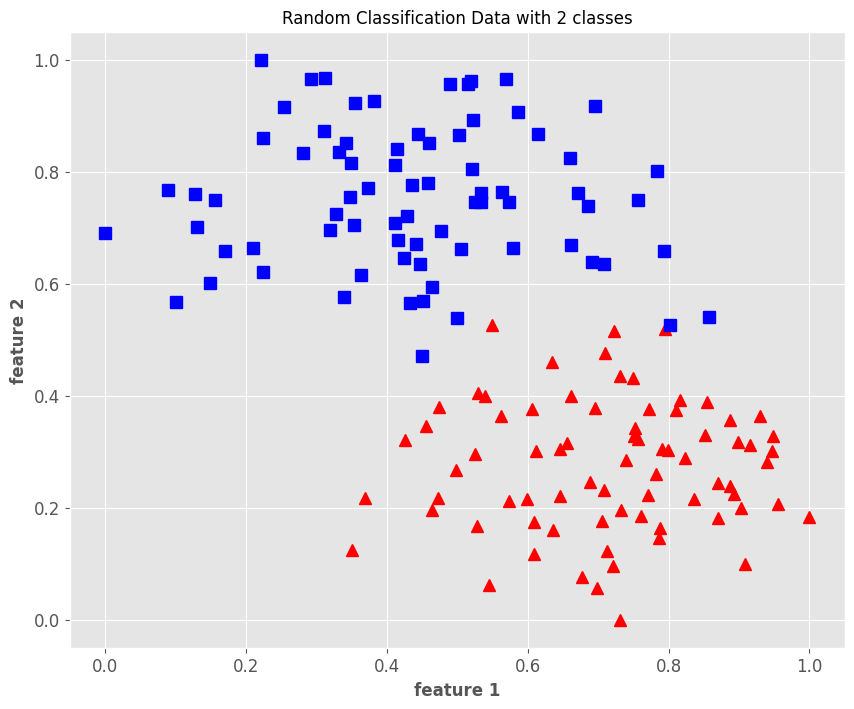

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=3.20)
y[y==0]=-1

#Plotting

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Let's define our perceptron with the learning rate and the number of epochs. 

In [4]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    loss_list = []
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            if y_hat==0:
              y_hat = -1
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)

                # Incrementing by 1.
                n_miss += 1
        #Defining the loss function
        x1 = X[:,0]
        x2 = X[:,1]
        theta_array = theta
        loss_value = (theta_array[1]*x1+theta_array[2]*x2+theta_array[0])*y
        loss_value = loss_value.sum()/len(x1)
        loss_list.append(loss_value)
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)

    return theta, n_miss_list,loss_list

In [5]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

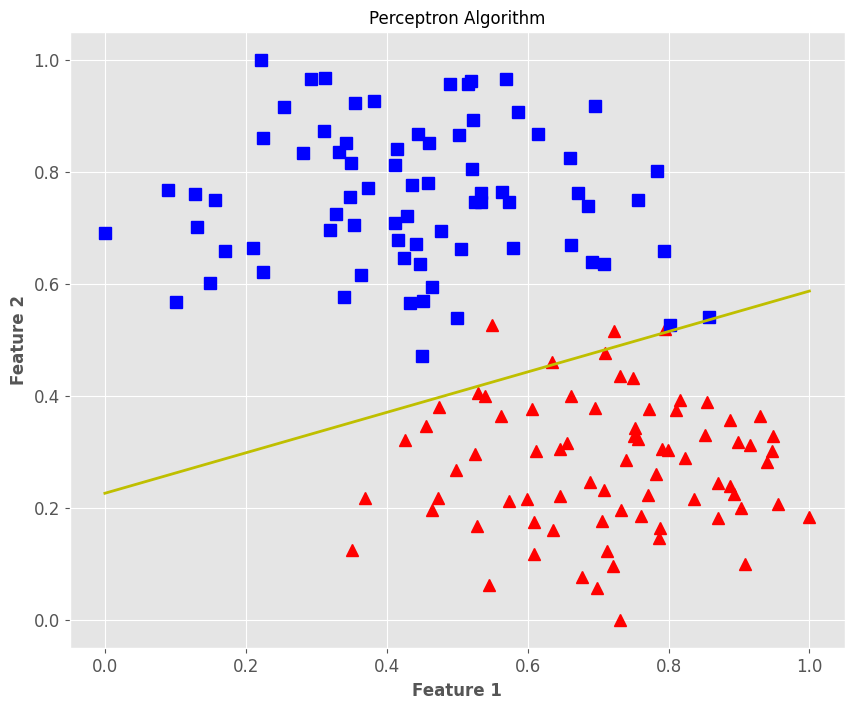

In [6]:
learning_rate , epoch = 0.005,200
theta, miss_l,loss_list= perceptron(X, y, learning_rate, epoch)
plot_decision_boundary(X, theta)

As it is possible to see, as the number of epochs increase, the number of wrong classified points decrease: it means that the algorithm is converging towards the solution. 

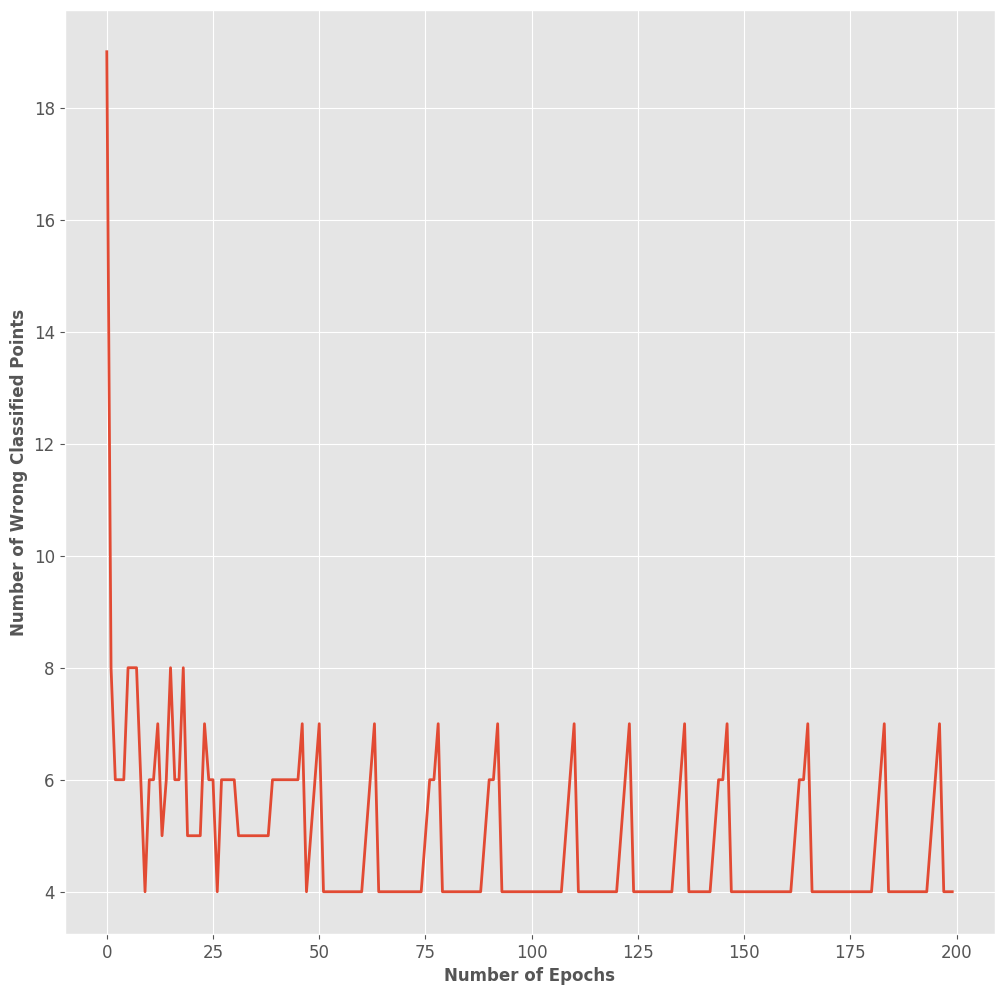

In [7]:
def plot_training(miss_l):
  plt.figure(figsize=(12,12))
  list_array = np.arange(0,len(miss_l),1)
  plt.xlabel('Number of Epochs')
  plt.ylabel('Number of Wrong Classified Points')
  plt.plot(list_array,miss_l)
plot_training(miss_l)

Let's consider the loss function of the Perceptron as well. This loss function has to be minimized. This means that we want it to decrease during the loss. 

Text(0, 0.5, 'Loss')

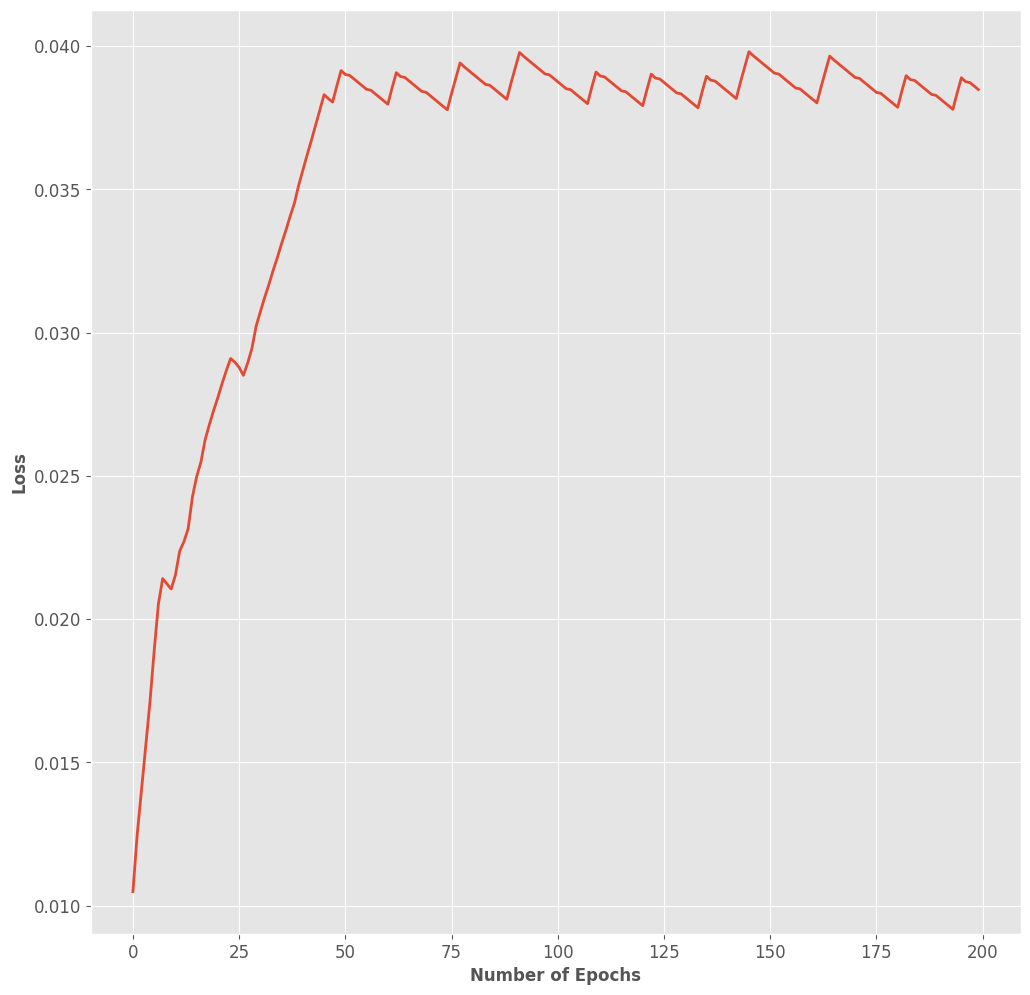

In [8]:
plot_training(loss_list)
plt.ylabel('Loss')

So the Loss is decreasing towards -∞. When the number of epoch is sufficiently large, the loss doesn't change because the algorithm has converged to the solution. Let's consider what happens when the dataset is not linearly separable. 



Text(0.5, 1.0, 'Random Classification Data with 2 classes')

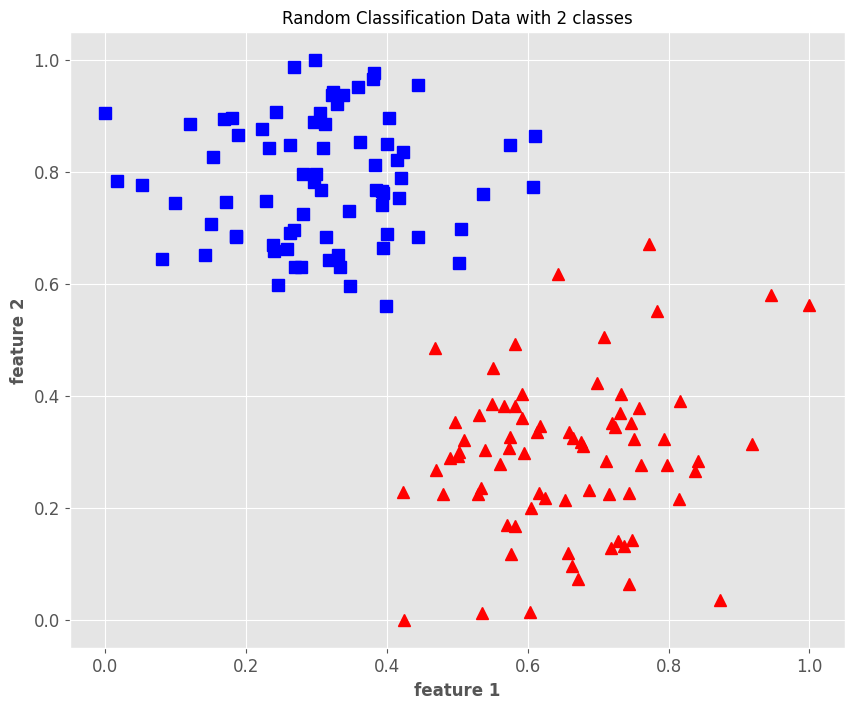

In [9]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=3.20)
y[y==0]=-1

#Plotting

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

Using a fixed learning rate and number of epoch, we can plot the number of wrong classified points and find the optimal value of learning rate and epochs. 

In [10]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)

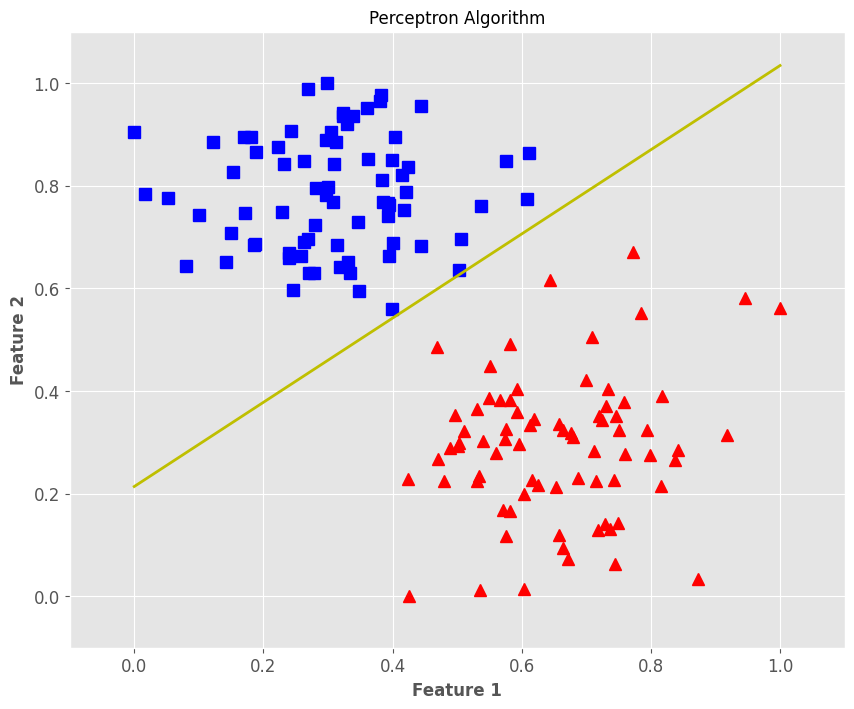

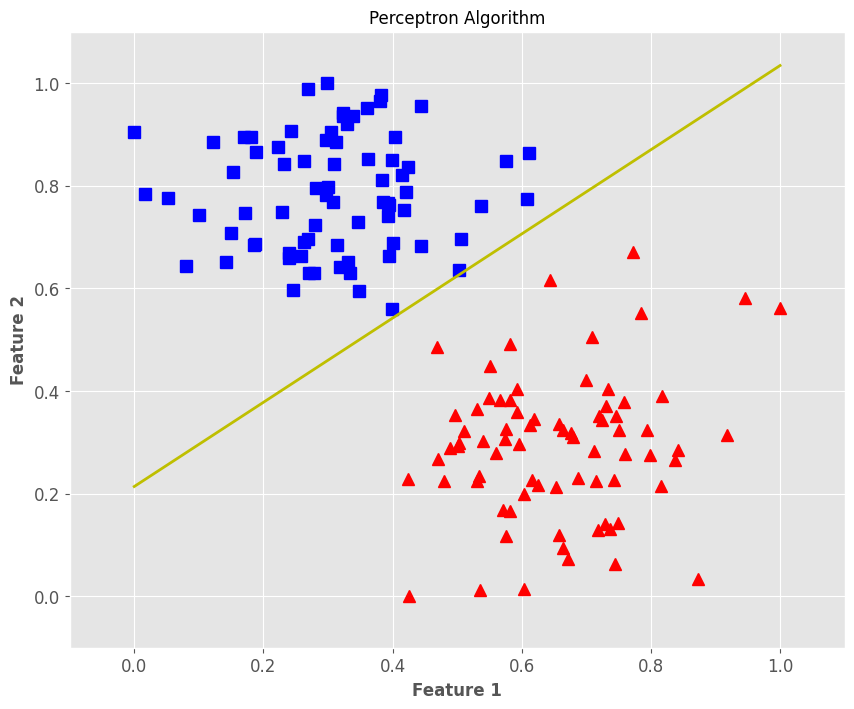

In [11]:
theta, miss_l,loss = perceptron(X, y, 0.2, 10)

plot_decision_boundary(X, theta)

theta, miss_l,loss = perceptron(X, y, 1, 20)

plot_decision_boundary(X, theta)

In [12]:
import warnings

warnings.filterwarnings('ignore')

In [13]:
from sklearn.linear_model import Perceptron
num_of_epochs = [10,100,500,1000]
etas = np.linspace(1e-5,1,100)
scores = []
for e in etas:
  for num in num_of_epochs:
    clf = Perceptron(eta0=e,max_iter=num)
    clf.fit(X, y)
    scores.append({'Num':num,'Eta':e.round(5),'Score':clf.score(X, y)})


In [14]:
import pandas as pd
import seaborn as sns
scores=pd.DataFrame(scores)
pivot = scores.pivot('Num','Eta','Score')

<AxesSubplot:xlabel='Eta', ylabel='Num'>

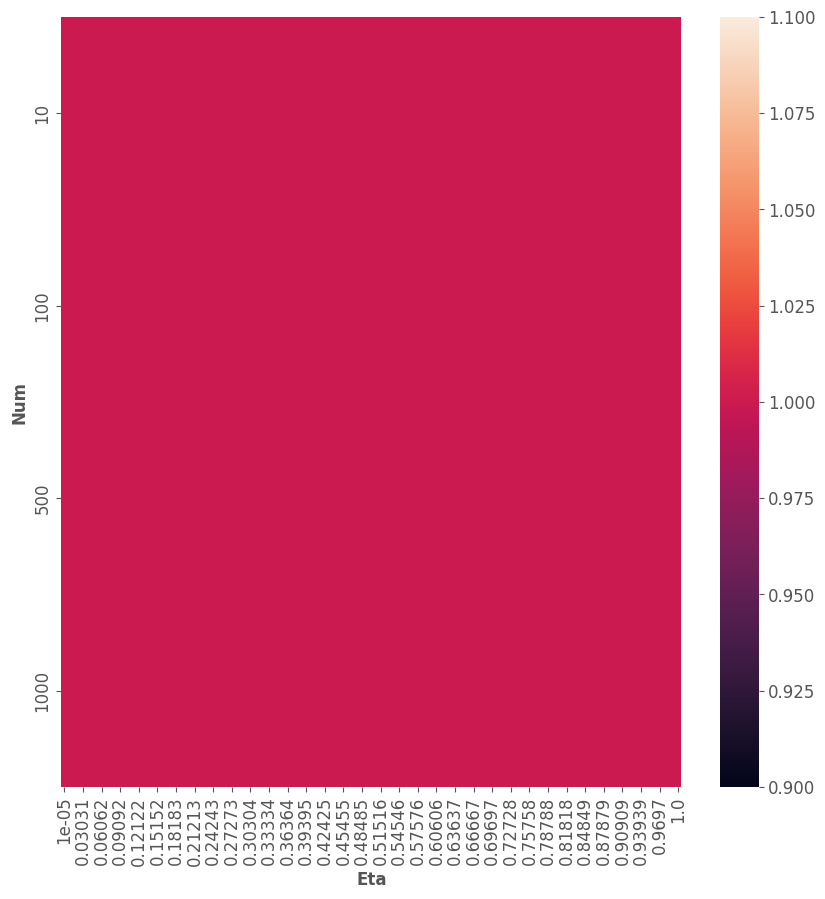

In [15]:
sns.heatmap(data=pivot)


In [16]:
scores[scores.Score==scores.Score.max()]

,Num,Eta,Score
0,10,0.00001,1.0
1,100,0.00001,1.0
2,500,0.00001,1.0
3,1000,0.00001,1.0
4,10,0.01011,1.0
...,...,...,...
395,1000,0.98990,1.0
396,10,1.00000,1.0
397,100,1.00000,1.0
398,500,1.00000,1.0


In this case, the learning rate η is far more important than the number of epochs. In fact, when $\eta\leq 0.03031$, we have that the score has the largest value as possible ($\approx$ 0.81% of accuracy) considering that we are using a linear model on a non linearly separable dataset. 

# 2. Neural Networks

Let's now consider a situation where the linear classifier of a perceptron can't find a solution, because the data are **clearly** not linearly classifiable. 

In [17]:
import keras
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


In [18]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

In [19]:
X,y = noisy_circles

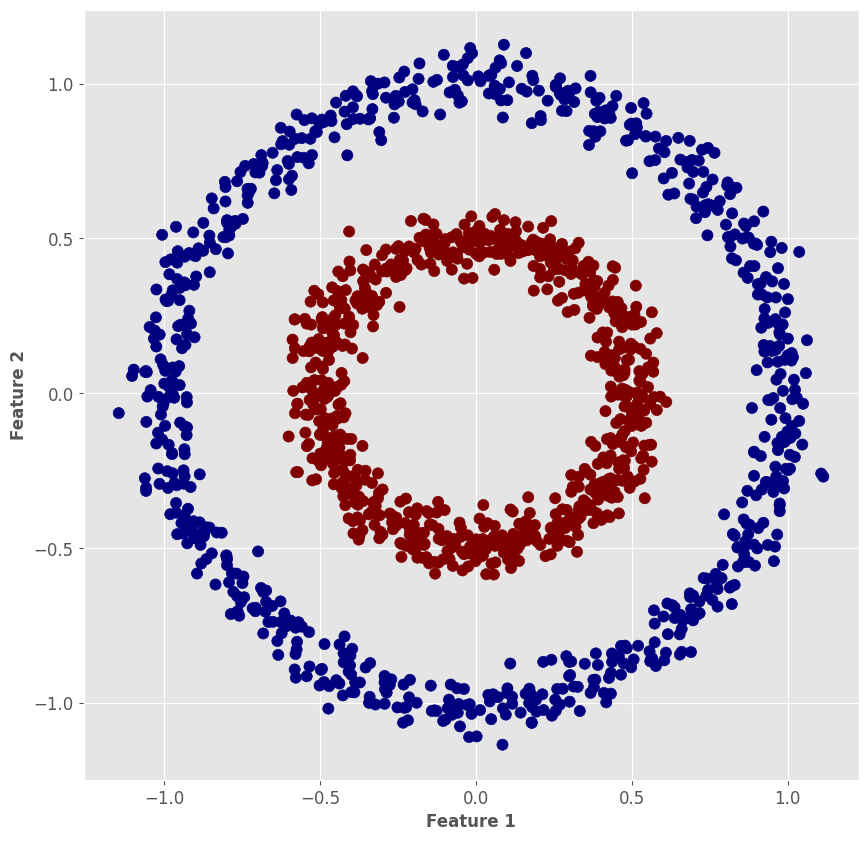

In [20]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X[:,0],X[:,1],c=y,label='Target')

In [21]:
import keras 
def define_model(N):
  model = keras.Sequential([keras.layers.Dense(units=N, input_shape=(2,) ),
          # randomly delete 30% of the input units below
          keras.layers.Dropout(0.3),
          keras.layers.Dense(units=int(N/2),activation='relu'),
          # the output layer, with a single neuron
          keras.layers.Dense(units=1,activation='sigmoid')])
  return model
model = define_model(50)
model.summary()
# save the initial weights for later
initial_weights = model.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


This is the structure of the Neural Network Classifier we will use. The model is reasonably powerful ($10^3$ parameters). 

In [22]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


The loss we are going to use is binary crossentropy and it is the kind of loss that you use in a binary classification problem. The idea is to minimize the entropy, that is, informally, the distance between the target classification's distribution and the one we are estimating in the final "logit". 

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's train our model, considering the fact that there is an early stopping that monitors the loss. We have a patience of 2 steps, then if we are not decreasing our loss we simply stop training. 

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.fit(X,y,epochs=40,callbacks=[callback])

Epoch 1/40
47/47 [==============================] - 2s 5ms/step - loss: 0.6851 - accuracy: 0.4727
Epoch 2/40
47/47 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.5753
Epoch 3/40
47/47 [==============================] - 0s 5ms/step - loss: 0.5981 - accuracy: 0.7220
Epoch 4/40
47/47 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.9040
Epoch 5/40
47/47 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.9653
Epoch 6/40
47/47 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.9673
Epoch 7/40
47/47 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.9807
Epoch 8/40
47/47 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.9867
Epoch 9/40
47/47 [==============================] - 0s 5ms/step - loss: 0.1969 - accuracy: 0.9927
Epoch 10/40
47/47 [==============================] - 0s 5ms/step - loss: 0.1682 - accuracy: 0.9847
Epoch 11/40
47/47 [

So the accuracy of the model is practically perfect. Let's plot the decision boundaries. 

In [26]:
!pip install -U -q --verbose mlxtend
from mlxtend.plotting import plot_decision_regions


     ---------------------------------------- 1.3/1.3 MB 12.3 MB/s eta 0:00:00


31250/31250 [==============================] - 48s 2ms/step


<AxesSubplot:>

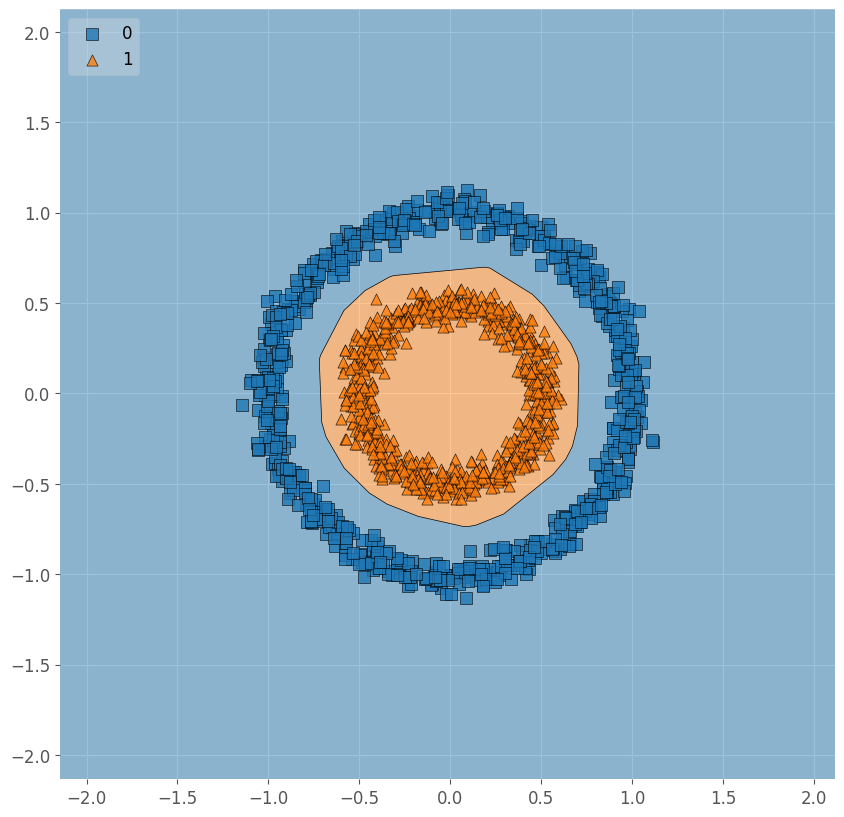

In [27]:
plot_decision_regions(X, y, clf=model, legend=2)


And the confusion matrix.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y,model.predict(X).round(1).astype(int))

47/47 [==============================] - 0s 2ms/step


array([[750,   0],
       [ 68, 682]], dtype=int64)

Of course, if we use the Percpetron to perform the same task, the quality of the classification is much worse.

In [30]:
clf = Perceptron()
clf.fit(X,y)
clf.score(X,y)

0.5006666666666667

<AxesSubplot:>

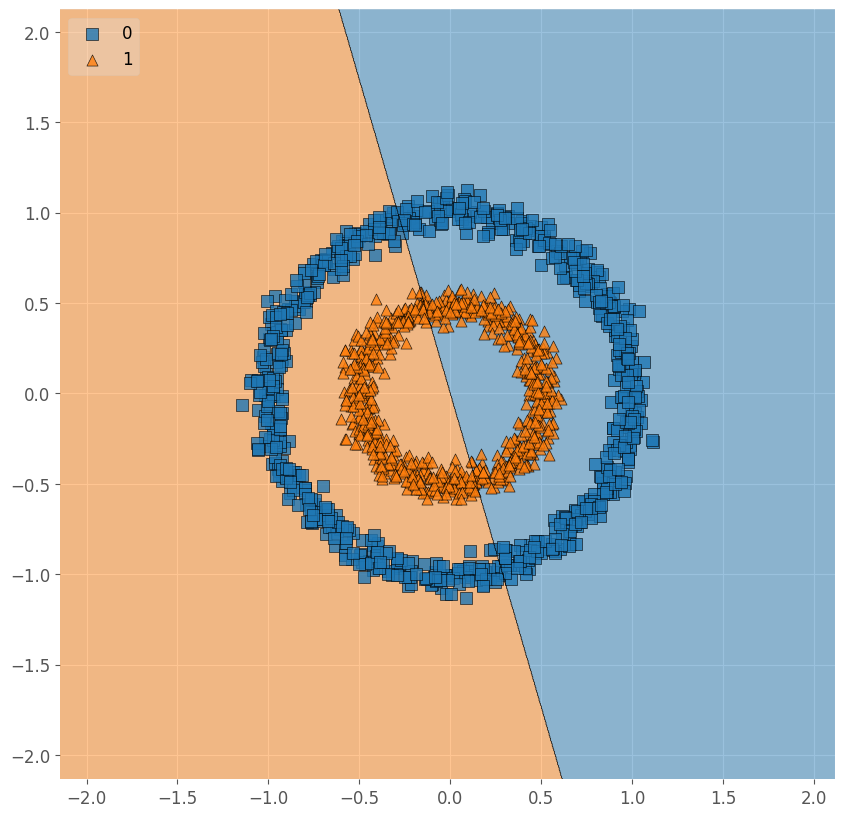

In [31]:
plot_decision_regions(X, y, clf=clf, legend=2)


# 3. Support Vector Machines (SVM)

The idea of the Support Vector Machines is to maximize the margin. This means that we want the boundaries to be as large as possible. Intuitively, it is because we want to be **sure** about the classification we are performing and if the boundaries is small a stocastic variation can make a big difference in terms of classification, which is not ideal. 

Formally speaking, we want to minimize a function of the weight of the boundaries $\mathbf{w}$. Nonetheless, we need to be sure that the separating hyperplane that we find respects the so called **support vector** condition. It means that we want to have some points that are exactly laying in the boundaries and all the other points that are correctly classified inside the correct region defined by the hyperplane. For example, in a binary classification problem, the SVM splits the plane in two sides. Then, we want all the points with label y=1 to be in one side and all the points with label y=-1 to be in the other side. 

Mathematically, the problem is a minimization of a the loss function $\mathcal{L}$.

$$ \min \ \ \mathcal{L} = \frac{1}{2}\mathbf{w}\cdot \mathbf{w} - \mathbf{\lambda}^T(\mathbf{y}(\mathbf{XW+1}b)-\mathbf{1})$$
\
Of course, we want to find the solution that gives us $\frac{\partial\mathcal{L}}{\partial \mathbf{w}}=0$. The so called **dual problem** is the following:
$$\mathcal{L}= -\frac{1}{2}\pmb{\lambda}^\top\mathbf{P}\pmb{\lambda} + \mathbf{1}^\top \pmb{\lambda}$$.


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as mi
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [33]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting  model for grid search
grid.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.530 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.513 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.523 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.493 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.497 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.523 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.497 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.520 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.493 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.493 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.530 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

Using a linear SVM, we can do better than the perceptron (from 0.50 to 0.54), but of course the accuracy is still low (just slightly better than flipping a coin). On the other hand, if we use the **kernel trick** we are implicitly able to explore a non linear space. We do it in the following way:

In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting  model for grid search
grid.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ...................C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ...................C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ...................C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ...................C=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=10, kernel=rbf;,

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
             verbose=3)

<AxesSubplot:>

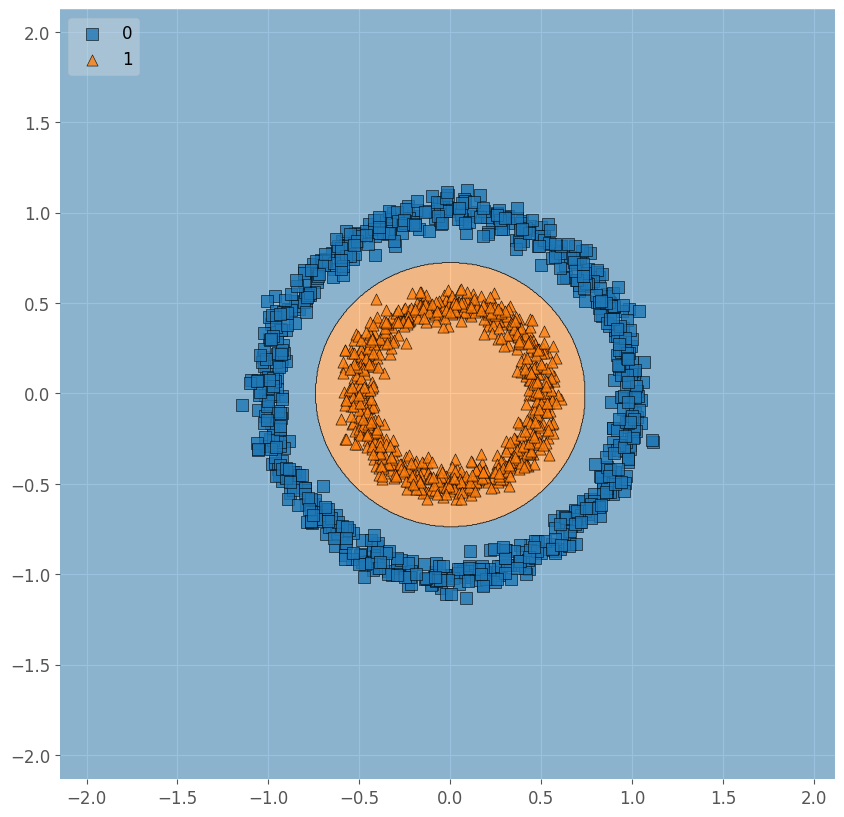

In [35]:
plot_decision_regions(X, y, clf=grid, legend=2)


Now, the classification is of course perfect. Moreover, the classification is far **smoother** than the one of the Neural Network. This is because the RBF kernel is explicitly made to solve this kind of "circled" dataset. 

Let's now make a 

In [36]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

In [37]:
from sklearn.datasets import make_circles
import seaborn as sns
import pandas as pd
import numpy as np

X_small, y_small = make_circles(n_samples=(500,500), random_state=3, 
noise=0.14, factor = 0.4)
X_large, y_large = make_circles(n_samples=(300,300), random_state=3, 
noise=0.04, factor = 0.9)
y_large[y_large==1] = 2

In [41]:
df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])
df = df.replace({'label': 1}, 0)
df = df.sample(frac=1)

In [52]:
#sns.scatterplot(df.x1,df.x2,c=df.label)
df.head()



,x1,x2,label
677,0.316307,-0.076900,0
366,-0.068417,-0.696350,0
988,-0.276371,0.025126,0
1307,0.976992,0.094860,0
305,0.314051,-0.311341,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

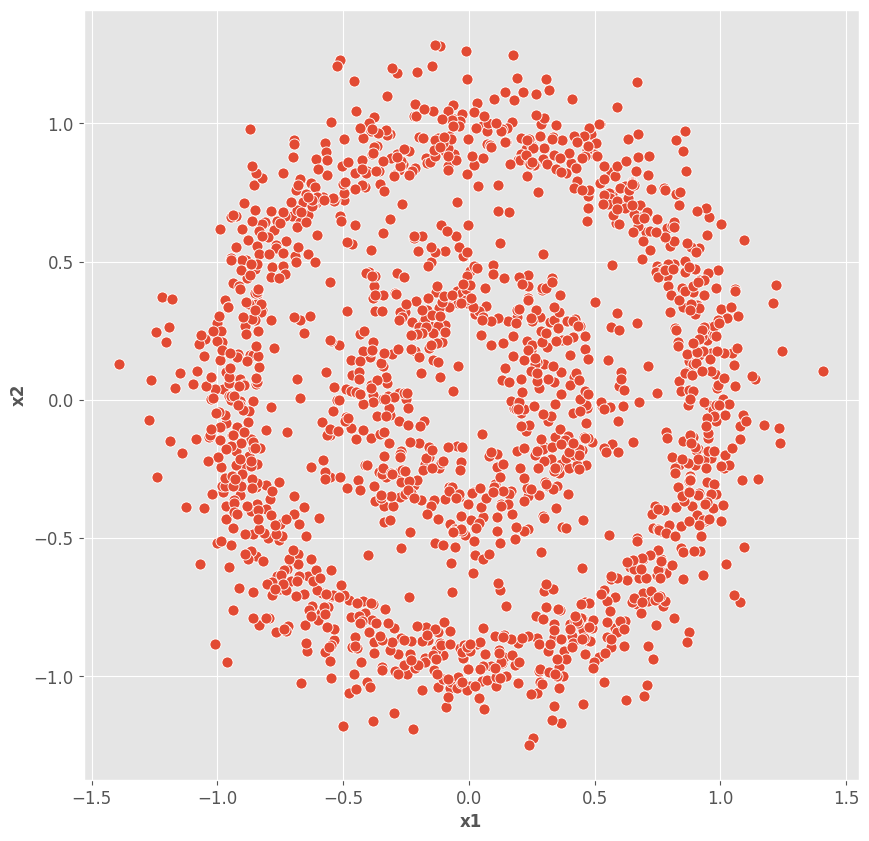

In [54]:
sns.scatterplot(data=df, x="x1",y="x2")

In [55]:
X = df[['x1','x2']]
y = df['label'].astype(int)

In [56]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True,scoring='accuracy')
 
# fitting  model for grid search
grid.fit(X, y)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf']},
             scoring='accuracy')

<AxesSubplot:>

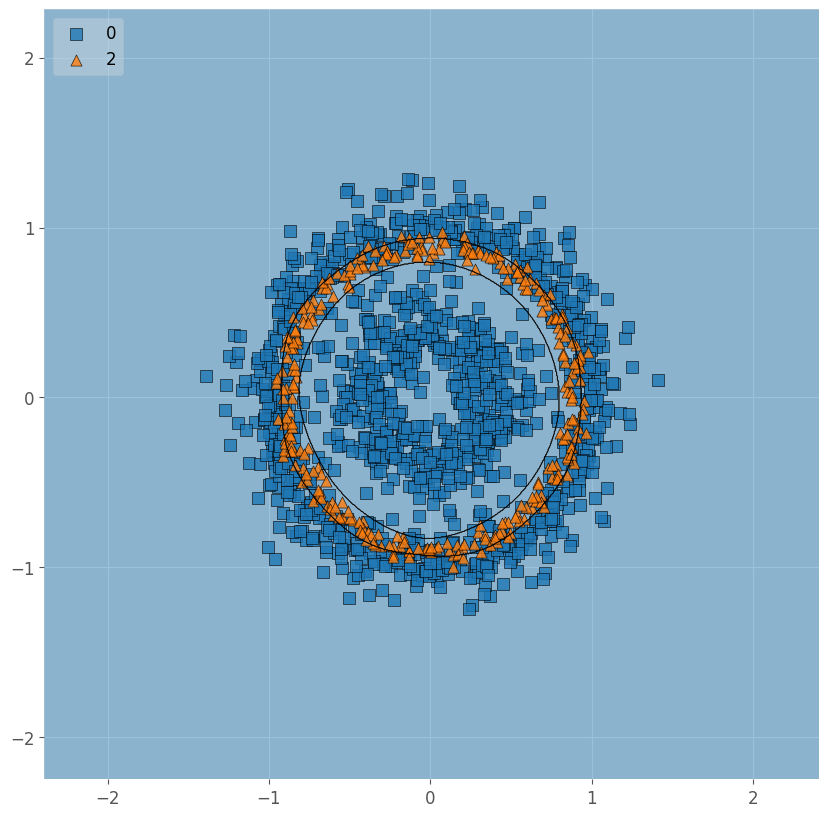

In [57]:
X = np.array(X)
y = np.array(y)
plot_decision_regions(X, y, clf=grid, legend=2)


In [58]:
from sklearn.metrics import accuracy_score 
accuracy_score(grid.predict(X),y)

0.883125

In [59]:
x = np.linspace(-1,1,1000)
z = []
for xi in x:
    z.append(step_func(xi))

In [60]:
def step_func(z):
        return 1.0 if (z > 0) else -1.0

Text(0, 0.5, 'Step Function Output')

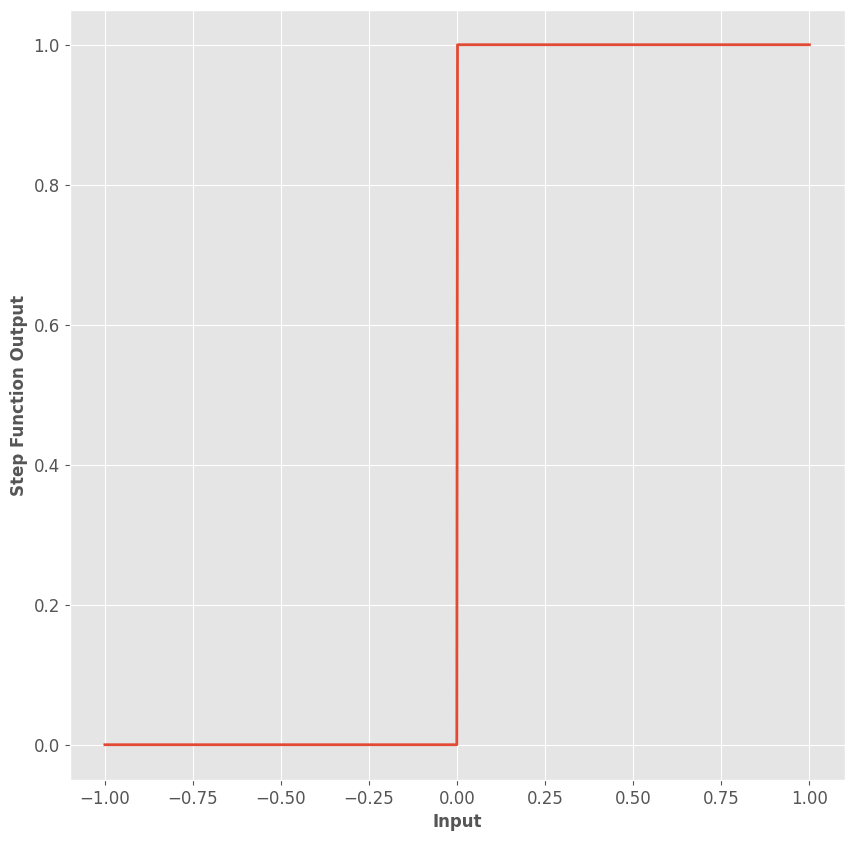

In [61]:
plt.plot(x,z)
plt.xlabel('Input')
plt.ylabel('Step Function Output')